In [ ]:
### DATA ANALYSIS AND VISUALIZATION ON REDDIT NYC APARTMENTS

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

In [7]:
data = pd.read_csv("./data/reddit_posts_nyc_apt.csv", index_col=0)

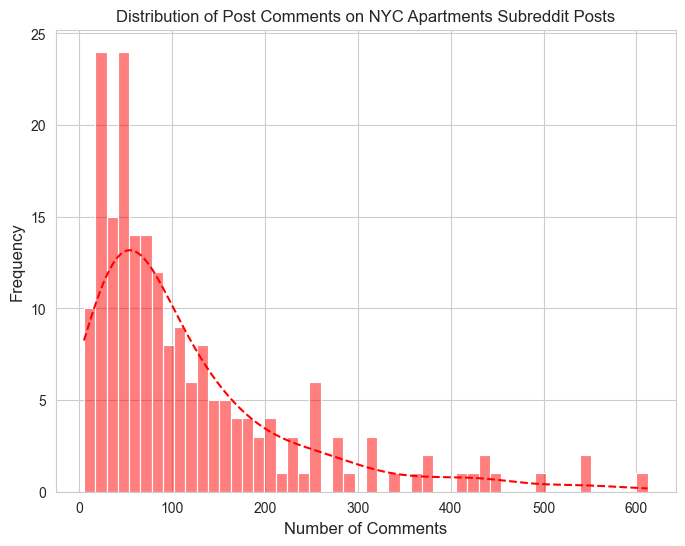

In [3]:
# Plot distribution of post comments
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='num_comments', kde=True, ax=ax, bins=50,
             color='red', line_kws={'linestyle':'--'})
_ = ax.set_xlabel('Number of Comments', fontsize=12)
_ = ax.set_ylabel('Frequency', fontsize=12)
_ = ax.set_title('Distribution of Post Comments on NYC Apartments Subreddit Posts')

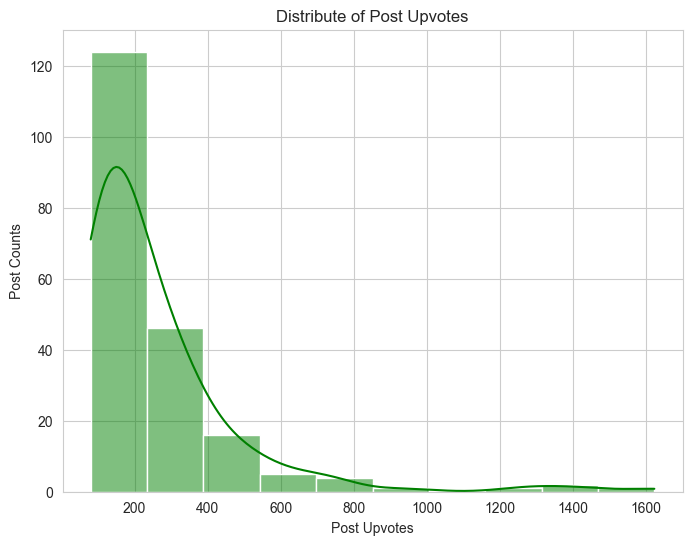

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='score', kde=True, ax=ax, color='green', bins=10)
_ = ax.set_xlabel('Post Upvotes')
_ = ax.set_ylabel('Post Counts')
_ = ax.set_title('Distribute of Post Upvotes')

In [8]:
# assign engagement - num comments and upvotes (score)
data = data.assign(engagement = data.score + data.num_comments)

In [9]:
# look at engagements - top 5
data.sort_values(by = 'engagement', ascending=False)[:5]

,subreddit,title,score,num_comments,url,comments,engagement
0,r/NYCapartments,Midtown manhattan Studio with great view,1622,289,https://redd.it/1ditjh8,"['$5000 for a studio 😕', 'It comes with person...",1911
3,r/NYCapartments,The rent crisis in NYC is becoming increasingl...,1256,371,https://redd.it/1aq7si7,"['Two incomes no kids.', 'Tell me about it, I ...",1627
2,r/NYCapartments,Those with high rise skyline apartments do you...,1338,249,https://redd.it/1fwnevs,['I didn’t live in one but I worked at an offi...,1587
1,r/NYCapartments,"Spacious studio on the UWS, great location ste...",1434,57,https://redd.it/1at9s69,"['When can I move in?', 'Wow! What a steal!', ...",1491
8,r/NYCapartments,Would I be stupid to leave a $860 rent stabili...,697,544,https://redd.it/1but5uy,"[""Everyone is different so make the best choic...",1241


In [10]:
# Get the top 5 posts based on this new engagement metric
top_engaged_posts = data.nlargest(5, 'engagement')

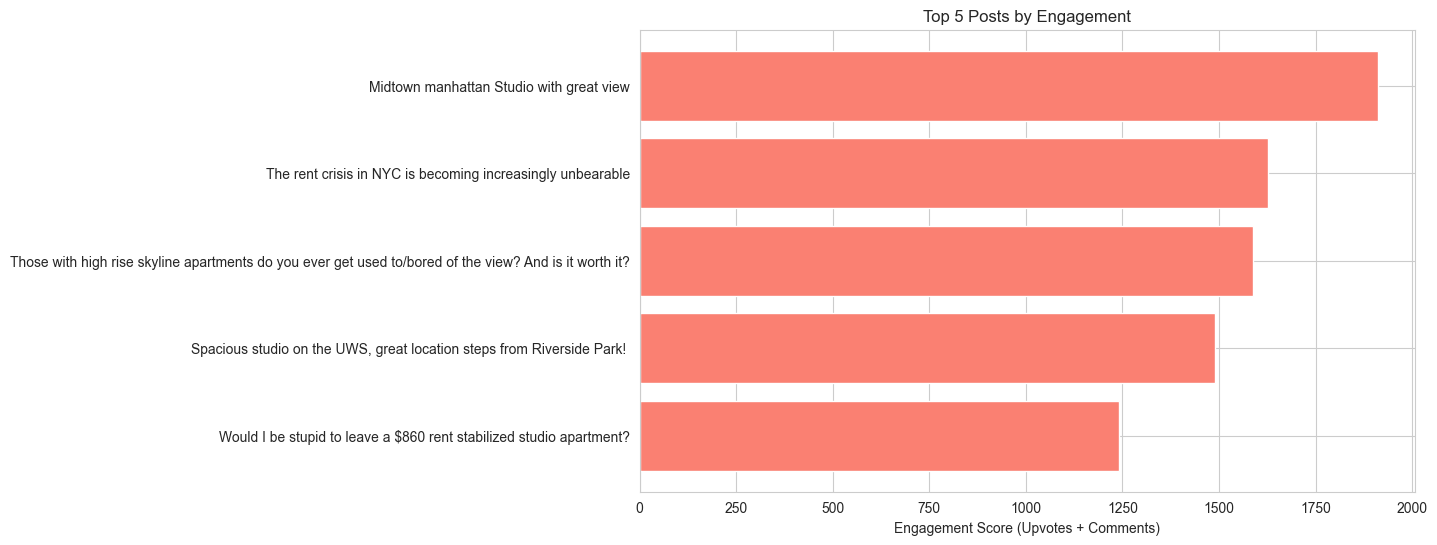

In [11]:
# plot engagements
plt.figure(figsize=(10, 6))
plt.barh(top_engaged_posts['title'], top_engaged_posts['engagement'], color='salmon')
plt.xlabel('Engagement Score (Upvotes + Comments)')
plt.title('Top 5 Posts by Engagement')
plt.gca().invert_yaxis()
plt.show()


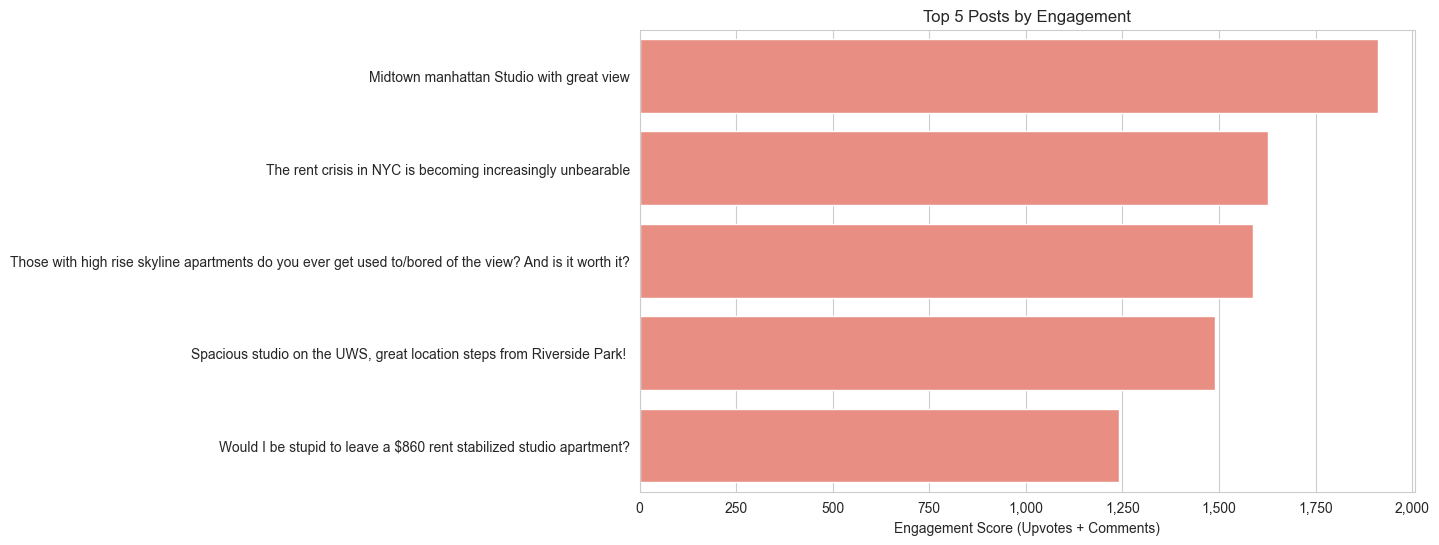

In [12]:
# Create the bar chart with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='engagement', y='title', data=top_engaged_posts, color='salmon')

# Set the x-axis label
_ = plt.xlabel('Engagement Score (Upvotes + Comments)')

# Format the x-axis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the title
_ = plt.title('Top 5 Posts by Engagement')
_ = ax.set_ylabel('')

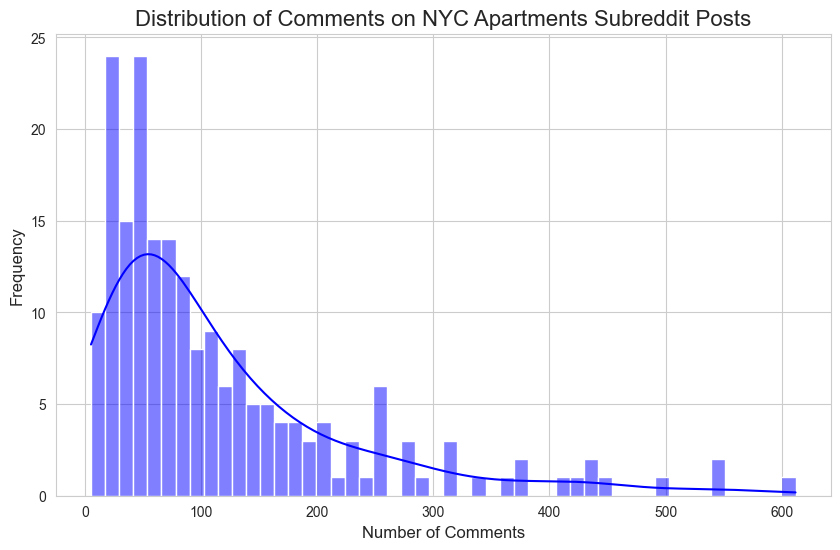

In [13]:
# Plot distribution of comments
plt.figure(figsize=(10,6))
sns.histplot(data['num_comments'], bins=50, kde=True, color='blue')
plt.title('Distribution of Comments on NYC Apartments Subreddit Posts', fontsize=16)
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

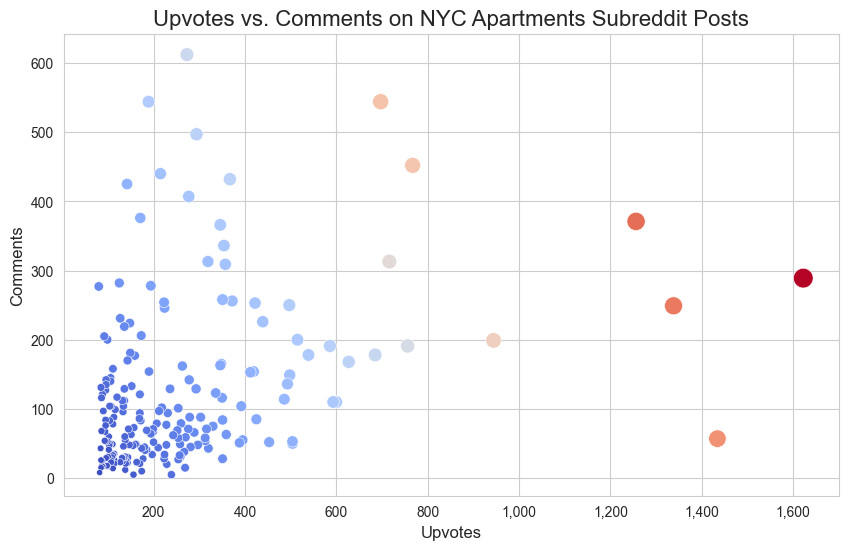

In [14]:
# Scatter plot of upvotes vs comments
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='score', y='num_comments', data=data, hue='engagement', size='engagement', sizes=(20, 200), 
                palette='coolwarm', legend=None)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Upvotes vs. Comments on NYC Apartments Subreddit Posts', fontsize=16)
plt.xlabel('Upvotes', fontsize=12)
plt.ylabel('Comments', fontsize=12)
plt.show()

/var/folders/y4/8c0n8_2x5fq9rd9gn92lqkvm0000gn/T/ipykernel_47647/367028662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='engagement', y='title', data=top_engaged_posts, palette='viridis')


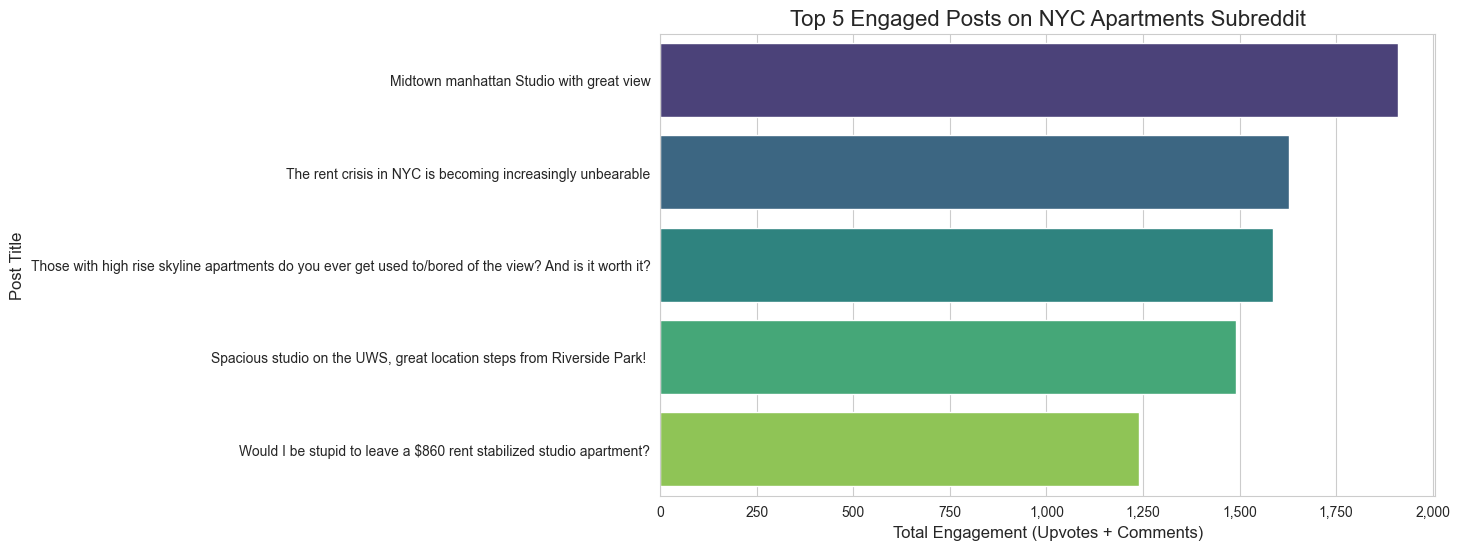

In [15]:
# Bar chart for top 5 engaged posts
top_engaged_posts = data.nlargest(5, 'engagement')

plt.figure(figsize=(10,6))
ax = sns.barplot(x='engagement', y='title', data=top_engaged_posts, palette='viridis')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Top 5 Engaged Posts on NYC Apartments Subreddit', fontsize=16)
plt.xlabel('Total Engagement (Upvotes + Comments)', fontsize=12)
plt.ylabel('Post Title', fontsize=12)
plt.show()
# Format the x-axis with commas


